  Windy AirQuality  Hot PlayTennis
0    No         No   No         No
1   Yes         No  Yes        Yes
2   Yes        Yes   No        Yes
3   Yes        Yes  Yes         No
[[1 1 1]
 [0 0 0]
 [1 0 1]
 [1 1 0]]


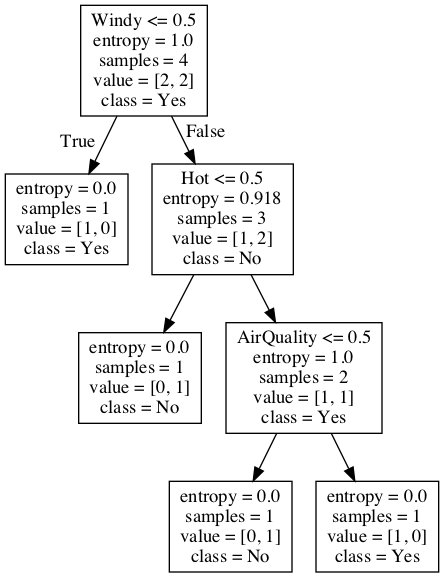

In [8]:
#!/usr/bin/python
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from IPython.display import Image
import pydotplus
from sklearn import tree

data = pd.read_csv('/Users/vigneshkumarthangarajan/Documents/255-Data-Mining/homework-2/tennisdata.csv', sep=',', header = 0)
print(data.head())

data = data.apply(preprocessing.LabelEncoder().fit_transform)

# No need to Split the dataset into train and test 
train=data.sample(frac=1.0,random_state=200)

train_x = train.values[:, 0:3]
train_y = train.values[:, 3]
print(train_x)

col = ['Windy','AirQuality','Hot']
clas = ['Yes', 'No']

# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100)

# Performing training
clf_entropy.fit(train_x, train_y)

dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=col,  
                                class_names=clas)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())